# L03 11/03/24

# Feature scaling

- Robust scaler, every feature vethe interquartile Range.ctor X is transofrmed in a vector X' as: X' = (X- Xmedian)/ IQR where IQR is the interquartile range.
- Z-score (Standardization): every feature vector X is distributed according to a mean mu and variance sigma is transformed in a vector X' with a standard distribution, with mean 0 anda variance 1:

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('EEG-data.csv', sep=',', index_col=0)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X4086,X4087,X4088,X4089,X4090,X4091,X4092,X4093,X4094,y
0,-56,-50,-64,-91,-135,-140,-134,-114,-115,-126,...,-37,-43,-63,-82,-114,-138,-159,-172,-180,5
1,14,25,31,36,33,33,27,27,21,24,...,-45,-32,-6,-7,-2,-20,-34,-40,-40,5
2,-159,-176,-174,-145,-101,-45,0,29,15,15,...,-40,-25,14,56,73,48,-12,-62,-100,4
3,34,31,29,19,16,12,3,-1,-5,-8,...,-34,-33,-29,-22,-18,-14,-10,-9,0,3
4,44,50,46,43,43,46,45,40,36,31,...,4,5,6,6,2,1,0,-1,-4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,12,22,35,45,69,74,79,78,66,43,...,-22,-21,-21,-25,-26,-26,-38,-38,-41,5
496,35,41,56,70,82,91,101,104,112,115,...,9,11,17,39,54,54,34,29,31,2
497,51,79,94,97,108,114,105,78,47,25,...,57,48,36,28,23,30,36,49,47,4
498,56,45,39,40,45,53,55,53,58,68,...,-24,-21,-27,-37,-27,-18,0,-27,-34,1


In [5]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X4086,X4087,X4088,X4089,X4090,X4091,X4092,X4093,X4094,y
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.00000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,-3.706000,-9.800000,-16.104000,-18.838000,-16.654000,-12.09200,-6.45200,-2.154000,1.772000,4.216000,...,-3.472000,-5.944000,-5.666000,-4.044000,-2.592000,-1.904000,-2.036000,-1.186000,0.912000,3.00000
std,145.261755,163.152645,188.203226,201.162005,188.853673,164.93878,153.48998,155.177209,155.595875,155.559773,...,156.699863,181.343287,184.595269,172.991358,166.192218,167.106625,177.480651,181.678655,173.866303,1.41563
min,-985.000000,-1221.000000,-1406.000000,-1395.000000,-1291.000000,-880.00000,-998.00000,-1156.000000,-1009.000000,-665.000000,...,-1257.000000,-1607.000000,-1583.000000,-1224.000000,-1094.000000,-1400.000000,-1697.000000,-1547.000000,-1120.000000,1.00000
25%,-49.000000,-54.000000,-52.000000,-53.000000,-53.250000,-57.25000,-55.00000,-56.000000,-58.250000,-57.000000,...,-53.500000,-54.250000,-52.000000,-48.250000,-47.000000,-48.250000,-51.000000,-56.250000,-56.250000,2.00000
50%,-8.000000,-8.000000,-7.000000,-8.500000,-8.000000,-6.50000,-5.00000,-7.000000,-5.000000,-5.000000,...,-8.000000,-9.500000,-9.000000,-9.500000,-7.000000,-9.500000,-6.000000,-7.000000,-5.000000,3.00000
75%,36.000000,38.500000,38.000000,39.000000,42.000000,40.25000,39.00000,37.000000,37.250000,33.250000,...,28.000000,31.250000,31.250000,32.250000,34.000000,39.000000,41.250000,42.250000,46.000000,4.00000
max,800.000000,839.000000,857.000000,876.000000,893.000000,928.00000,973.00000,1045.000000,1381.000000,1502.000000,...,858.000000,962.000000,925.000000,911.000000,914.000000,919.000000,916.000000,829.000000,781.000000,5.00000


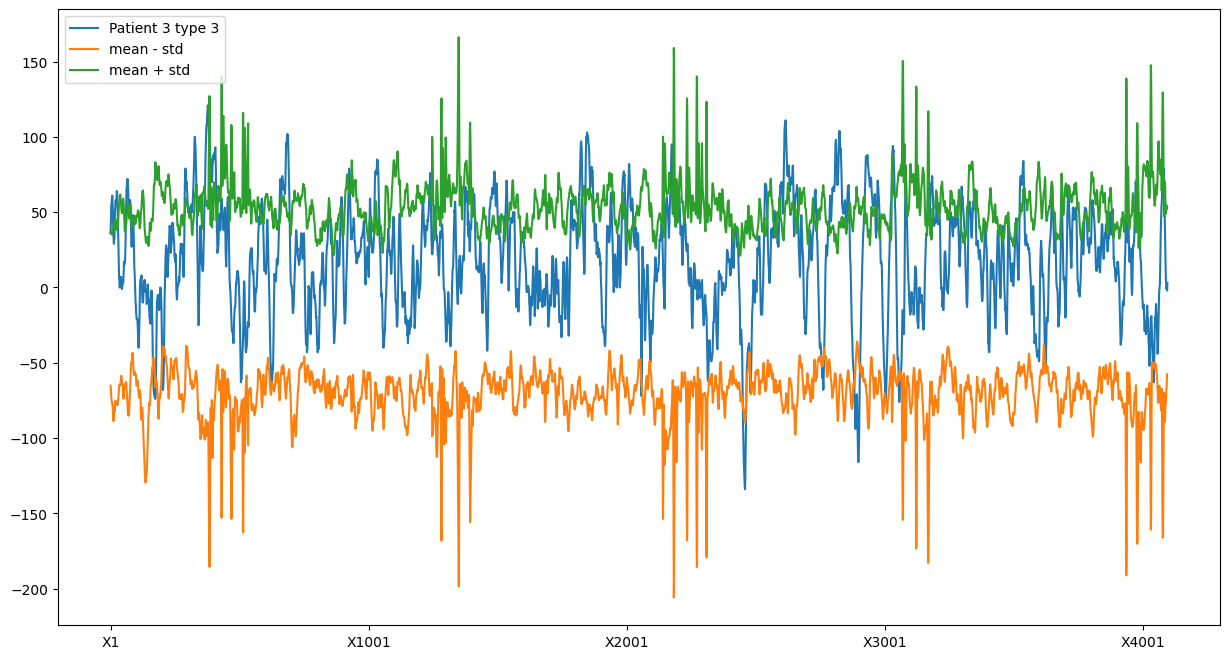

In [6]:
patientsType = 3
patient = 3

plt.figure(figsize=(15, 8))
plt.plot(range(0, len(df.columns)), df[df['y'] == patientsType].iloc[patient], label='Patient ' + str(patient) + ' type ' + str(patientsType))
(df[df['y'] == 3].describe().iloc[1][:-1] - df[df['y'] == 3].describe().iloc[2][:-1]).plot(label='mean - std')
(df[df['y'] == 3].describe().iloc[1][:-1] + df[df['y'] == 3].describe().iloc[2][:-1]).plot( label='mean + std')
plt.legend()
plt.show()

In [7]:
describe = df.describe()

(describe.iloc[1] - describe.iloc[2])
(describe.iloc[1] + describe.iloc[2])

mean = describe.iloc[1]
std = describe.iloc[2]

In [8]:
import numpy as np

np.divide((df['X1'] - mean['X1']), std['X1']).std()

1.0

In [9]:
normalized = pd.DataFrame()

for column in df:
    normalized[column] = (df[column] - mean[column]) / std[column]
std_normalized = normalized.describe().iloc[2]
mean_normalized = normalized.describe().iloc[1]
normalized


/var/folders/3t/9pfjmtv5277d5j2y93gvpb6m0000gn/T/ipykernel_10142/340065459.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[column] = (df[column] - mean[column]) / std[column]
/var/folders/3t/9pfjmtv5277d5j2y93gvpb6m0000gn/T/ipykernel_10142/340065459.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[column] = (df[column] - mean[column]) / std[column]
/var/folders/3t/9pfjmtv5277d5j2y93gvpb6m0000gn/T/ipykernel_10142/340065459.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X4086,X4087,X4088,X4089,X4090,X4091,X4092,X4093,X4094,y
0,-0.359998,-0.246395,-0.254491,-0.358726,-0.626654,-0.775488,-0.830986,-0.720763,-0.750483,-0.837080,...,-0.213963,-0.204342,-0.310593,-0.450635,-0.670356,-0.814426,-0.884401,-0.940199,-1.040524,1.412799
1,0.121890,0.213297,0.250283,0.272606,0.262923,0.273386,0.217943,0.187876,0.123577,0.127179,...,-0.265016,-0.143683,-0.001809,-0.017088,0.003562,-0.108290,-0.180099,-0.213641,-0.235307,1.412799
2,-1.069063,-1.018678,-0.838965,-0.627166,-0.446621,-0.199516,0.042035,0.200764,0.085015,0.069324,...,-0.233108,-0.105082,0.106536,0.347092,0.454847,0.298636,-0.056141,-0.334734,-0.580400,0.706399
3,0.259573,0.250073,0.239656,0.188097,0.172906,0.146066,0.061581,0.007437,-0.043523,-0.078529,...,-0.194818,-0.149198,-0.126406,-0.103797,-0.092712,-0.072385,-0.044872,-0.043010,-0.005245,0.000000
4,0.328414,0.366528,0.329984,0.307404,0.315874,0.352203,0.335214,0.271651,0.219980,0.172178,...,0.047684,0.060350,0.063198,0.058061,0.027631,0.017378,0.011472,0.001024,-0.028252,-0.706399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.108122,0.194909,0.271536,0.317346,0.453547,0.521963,0.556727,0.516532,0.412787,0.249319,...,-0.118239,-0.083025,-0.083068,-0.121139,-0.140849,-0.144195,-0.202636,-0.202632,-0.241059,1.412799
496,0.266457,0.311365,0.383118,0.441624,0.522383,0.625032,0.700059,0.684082,0.708425,0.712164,...,0.079592,0.093436,0.122788,0.248822,0.340521,0.334541,0.203042,0.166151,0.173053,-0.706399
497,0.376603,0.544276,0.585027,0.575844,0.660056,0.764478,0.726119,0.516532,0.290676,0.133608,...,0.385910,0.297469,0.225715,0.185235,0.153990,0.190920,0.214311,0.276235,0.265077,0.706399
498,0.411024,0.335882,0.292790,0.292491,0.326464,0.394643,0.400365,0.355426,0.361372,0.410029,...,-0.131002,-0.083025,-0.115572,-0.190507,-0.146866,-0.096322,0.011472,-0.142086,-0.200798,-1.412799


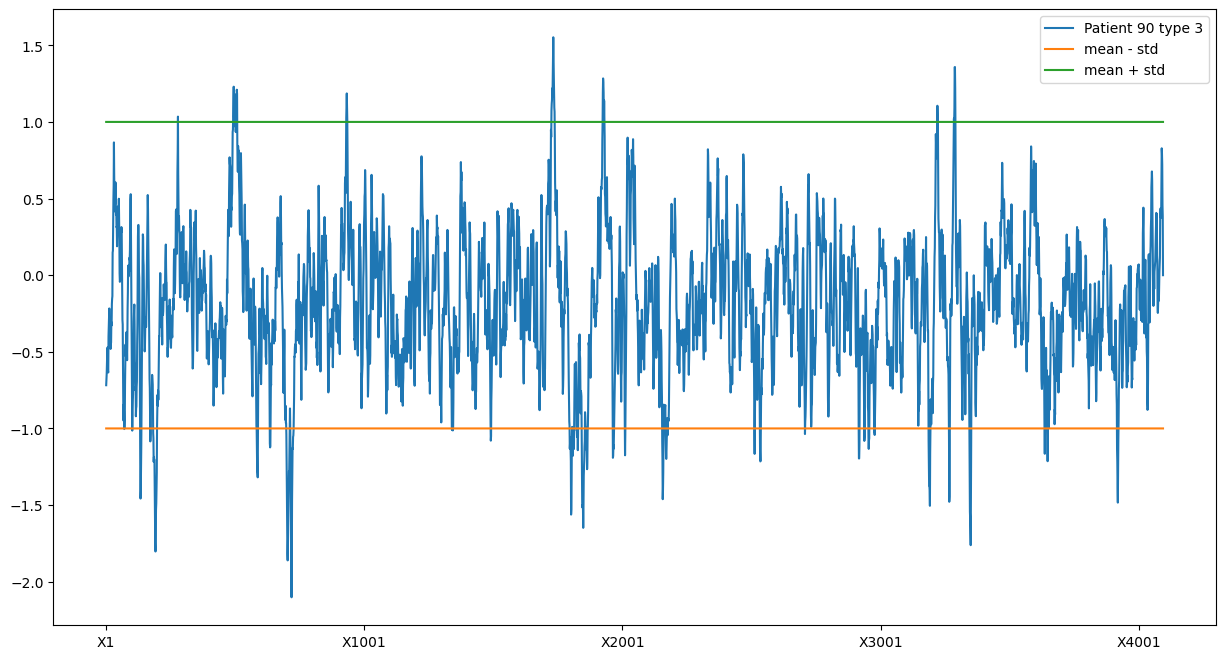

In [10]:
patient = 90
patientsType = 3

plt.figure(figsize=(15, 8))
plt.plot(range(0, len(normalized.columns)), normalized[df['y'] == patientsType].iloc[patient], label='Patient ' + str(patient) + ' type ' + str(patientsType))
(mean_normalized - std_normalized).plot(label='mean - std').plot()
(mean_normalized + std_normalized).plot(label='mean + std').plot()
plt.legend()
plt.show()

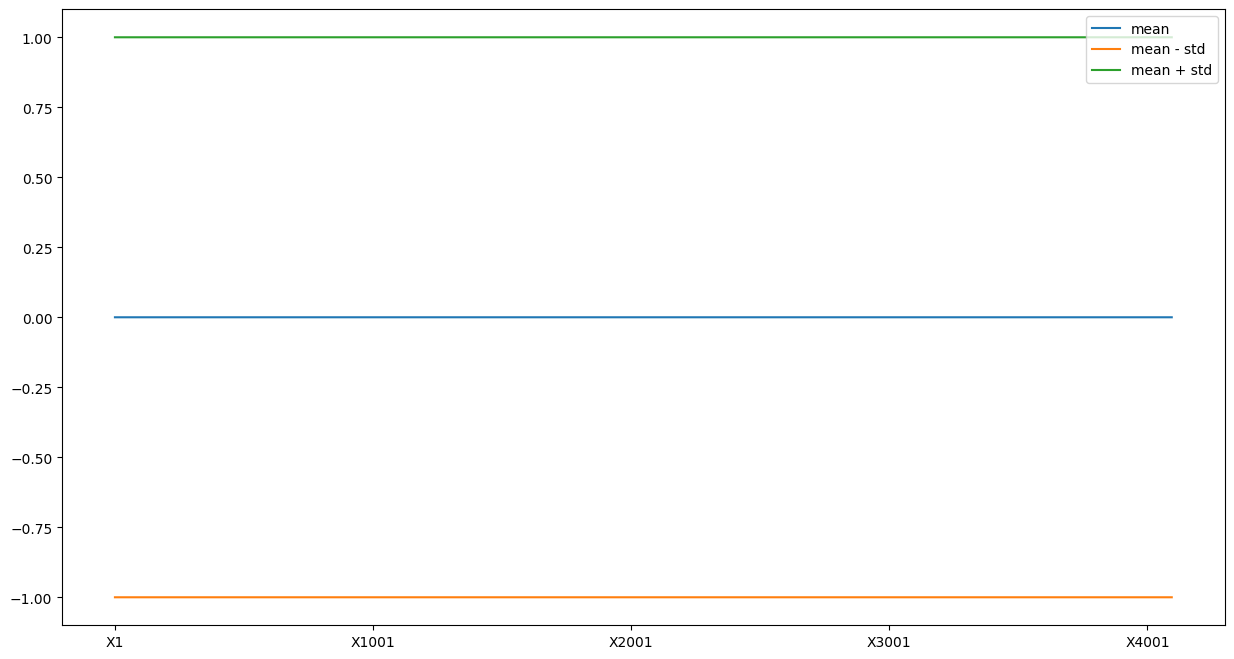

In [11]:
plt.figure(figsize=(15, 8))
mean_normalized.plot(label='mean')
(mean_normalized - std_normalized).plot(label='mean - std').plot()
(mean_normalized + std_normalized).plot(label='mean + std').plot()
plt.legend()
plt.show()

In [12]:
normalized.iloc[0]

X1      -0.359998
X2      -0.246395
X3      -0.254491
X4      -0.358726
X5      -0.626654
           ...   
X4091   -0.814426
X4092   -0.884401
X4093   -0.940199
X4094   -1.040524
y        1.412799
Name: 0, Length: 4095, dtype: float64

In [13]:
outliers = pd.DataFrame()
std_range = 2

for row in range (0, len(normalized)):
    sum = 0
    for value in normalized.iloc[row]:
        if value > std_range or value < -std_range:
            sum += 1
    if sum >= 2048:
        print('Patient ' + str(row) + ' has abnormal values')
    

Patient 13 has abnormal values
Patient 14 has abnormal values
Patient 39 has abnormal values
Patient 94 has abnormal values
Patient 99 has abnormal values
Patient 139 has abnormal values
Patient 149 has abnormal values
Patient 204 has abnormal values
Patient 269 has abnormal values
Patient 314 has abnormal values
Patient 384 has abnormal values
Patient 459 has abnormal values
Patient 479 has abnormal values


# Support Vector Machine (SVM)
Geometric classifier, it divides different classes in space, the hyperplane is in the dimesion of the features  
GIven two classes of linearly separable multidimensipnal patterns, of all possible separation hyperplanes, SVM determines the optimal one taht can separate the classes by the **greatest** possibile margin.  
The **margin** is the minimum distance of pounts of the two classes in the training set from discovered hyperplane, this is from where it takes the name, the r1 and r2 hyperplane is the support vectors that gives the gap in between separable patterns. **Maximizing** the margins are the **object function** for the SVM.

try in a normal way, loinear, margin 1, standardization  
try with just 400 channels  
Try with feature reduction

20 80 test training

To do in the document:
- intro (the clinical problem)
- task
- out solution
- methods
- datasets
- results
- conclusions

15/20 minutes of presentation  
to do before **25/03/24**

In [14]:
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


In [15]:
filtered = normalized[(df['y'] == 3) | (df['y'] == 4)]
filtered_labels = df[(df['y'] == 3) | (df['y'] == 4)]['y']
filtered_features = filtered.drop('y', axis=1)

train_features, test_features, train_labels, test_labels = train_test_split(filtered_features, filtered_labels, test_size=0.2, random_state=109) # 80% training and 20% test

# Create an SVM model using scikit-learn
svm_model = svm.SVC(kernel='linear', C=1.0)

# Fit the model to the data
svm_model.fit(train_features, train_labels)

# Make predictions on new data
outputs_sklearn = svm_model.predict(test_features)

In [16]:
sensitivity = (outputs_sklearn == test_labels).sum() / len(test_labels)
sensitivity

0.75

In [17]:
def train(data, labels, folds = 5, C = 1, kernel = 'linear', deterministic = False):
    
    seed = None
    if deterministic:
        seed = np.random.seed(0)
    # Create an SVM model using scikit-learn
    svm_model = svm.SVC(kernel=kernel, C = C)
    
    kf = KFold(n_splits=folds, shuffle=True, random_state=seed)
    kf.get_n_splits(data)
    sensitivity = []

    for i, (train_index, test_index) in enumerate(kf.split(data)):
        
        # Split the data into training and test sets
        train_features, test_features = data.iloc[train_index], data.iloc[test_index]
        train_labels, test_labels = labels.iloc[train_index], labels.iloc[test_index]
        
        # Fit the model to the data
        svm_model.fit(train_features, train_labels)
        
        # Make predictions on new data
        outputs_sklearn = svm_model.predict(test_features)
        
        # Calculate the sensitivity
        sensitivity.append((outputs_sklearn == test_labels).sum() / len(test_labels))
        
        # print('Sensitivity for fold ' + str(i) + ': ' + str(sensitivity[i]))

    accuracy_score(test_labels, outputs_sklearn)
    print('accuracy_score = '+str(accuracy_score(test_labels, outputs_sklearn)))
    tn, fp, fn, tp  = confusion_matrix(test_labels, outputs_sklearn).ravel()
    print('tn = '+str(tn)+' fp = '+str(fp)+' fn = '+str(fn)+' tp = '+str(tp))
    print('params = '+str(C)+' Mean sensitivity: ' + str(np.mean(sensitivity))+ '\n\n')

In [18]:
for C in np.arange(0.1, 2.1, 0.1):
    train(data = filtered_features, labels = filtered_labels, C=C, deterministic=False)


accuracy_score = 0.8
tn = 17 fp = 3 fn = 5 tp = 15
params = 0.1 Mean sensitivity: 0.7600000000000001


accuracy_score = 0.775
tn = 16 fp = 1 fn = 8 tp = 15
params = 0.2 Mean sensitivity: 0.735


accuracy_score = 0.725
tn = 16 fp = 4 fn = 7 tp = 13
params = 0.30000000000000004 Mean sensitivity: 0.77


accuracy_score = 0.7
tn = 15 fp = 6 fn = 6 tp = 13
params = 0.4 Mean sensitivity: 0.7649999999999999


accuracy_score = 0.7
tn = 12 fp = 8 fn = 4 tp = 16
params = 0.5 Mean sensitivity: 0.76


accuracy_score = 0.675
tn = 11 fp = 3 fn = 10 tp = 16
params = 0.6 Mean sensitivity: 0.735


accuracy_score = 0.875
tn = 25 fp = 2 fn = 3 tp = 10
params = 0.7000000000000001 Mean sensitivity: 0.745


accuracy_score = 0.725
tn = 18 fp = 1 fn = 10 tp = 11
params = 0.8 Mean sensitivity: 0.78


accuracy_score = 0.8
tn = 13 fp = 4 fn = 4 tp = 19
params = 0.9 Mean sensitivity: 0.765


accuracy_score = 0.675
tn = 15 fp = 2 fn = 11 tp = 12
params = 1.0 Mean sensitivity: 0.74


accuracy_score = 0.725
tn = 16 f

# Feature Selection

In [19]:
xmin = filtered_features.min()
xmax = filtered_features.max()

linear_norm = (filtered - xmin) / (xmax - xmin)


In [20]:
outliers = []
std_range = 1

for row in range (0, len(filtered)):
    sum = 0
    for value in filtered.iloc[row]:
        if value > std_range or value < -std_range:
            sum += 1
    if sum >= 100:
        outliers.append(True)
    else:
        outliers.append(False)

filtered[filtered.columns[0]][outliers]

2     -1.069063
21     0.225152
26     1.003058
27    -0.353114
36    -0.270505
         ...   
472   -0.607827
481    0.211384
491   -0.098402
497    0.376603
499   -0.442608
Name: X1, Length: 61, dtype: float64

In [21]:
normalized

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X4086,X4087,X4088,X4089,X4090,X4091,X4092,X4093,X4094,y
0,-0.359998,-0.246395,-0.254491,-0.358726,-0.626654,-0.775488,-0.830986,-0.720763,-0.750483,-0.837080,...,-0.213963,-0.204342,-0.310593,-0.450635,-0.670356,-0.814426,-0.884401,-0.940199,-1.040524,1.412799
1,0.121890,0.213297,0.250283,0.272606,0.262923,0.273386,0.217943,0.187876,0.123577,0.127179,...,-0.265016,-0.143683,-0.001809,-0.017088,0.003562,-0.108290,-0.180099,-0.213641,-0.235307,1.412799
2,-1.069063,-1.018678,-0.838965,-0.627166,-0.446621,-0.199516,0.042035,0.200764,0.085015,0.069324,...,-0.233108,-0.105082,0.106536,0.347092,0.454847,0.298636,-0.056141,-0.334734,-0.580400,0.706399
3,0.259573,0.250073,0.239656,0.188097,0.172906,0.146066,0.061581,0.007437,-0.043523,-0.078529,...,-0.194818,-0.149198,-0.126406,-0.103797,-0.092712,-0.072385,-0.044872,-0.043010,-0.005245,0.000000
4,0.328414,0.366528,0.329984,0.307404,0.315874,0.352203,0.335214,0.271651,0.219980,0.172178,...,0.047684,0.060350,0.063198,0.058061,0.027631,0.017378,0.011472,0.001024,-0.028252,-0.706399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.108122,0.194909,0.271536,0.317346,0.453547,0.521963,0.556727,0.516532,0.412787,0.249319,...,-0.118239,-0.083025,-0.083068,-0.121139,-0.140849,-0.144195,-0.202636,-0.202632,-0.241059,1.412799
496,0.266457,0.311365,0.383118,0.441624,0.522383,0.625032,0.700059,0.684082,0.708425,0.712164,...,0.079592,0.093436,0.122788,0.248822,0.340521,0.334541,0.203042,0.166151,0.173053,-0.706399
497,0.376603,0.544276,0.585027,0.575844,0.660056,0.764478,0.726119,0.516532,0.290676,0.133608,...,0.385910,0.297469,0.225715,0.185235,0.153990,0.190920,0.214311,0.276235,0.265077,0.706399
498,0.411024,0.335882,0.292790,0.292491,0.326464,0.394643,0.400365,0.355426,0.361372,0.410029,...,-0.131002,-0.083025,-0.115572,-0.190507,-0.146866,-0.096322,0.011472,-0.142086,-0.200798,-1.412799


In [22]:
df[(df['y'] == 3) | (df['y'] == 4)].corr(method='pearson')['y'].sort_values()

X3620   -0.277279
X3619   -0.267988
X3621   -0.264940
X752    -0.255764
X4052   -0.252432
           ...   
X139     0.225482
X3983    0.225611
X1256    0.227781
X1257    0.237110
y        1.000000
Name: y, Length: 4095, dtype: float64

In [23]:
correlation = df[(df['y'] == 3) | (df['y'] == 4)].corr(method='pearson')
correlation

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X4086,X4087,X4088,X4089,X4090,X4091,X4092,X4093,X4094,y
X1,1.000000,0.962309,0.882088,0.782155,0.665101,0.513204,0.363180,0.219026,0.141505,0.100674,...,0.087033,0.085183,0.063411,0.025254,0.002468,-0.009688,0.014017,0.063155,0.110002,0.025499
X2,0.962309,1.000000,0.967968,0.884699,0.756725,0.580301,0.394690,0.216923,0.115487,0.051107,...,0.093389,0.080322,0.054031,0.009172,-0.027963,-0.053627,-0.041104,-0.002991,0.049096,0.030871
X3,0.882088,0.967968,1.000000,0.960710,0.850464,0.674199,0.472934,0.266629,0.139127,0.056874,...,0.089174,0.070649,0.045315,0.004980,-0.033323,-0.063935,-0.058661,-0.031719,0.017187,0.041707
X4,0.782155,0.884699,0.960710,1.000000,0.950809,0.809578,0.618133,0.394274,0.239789,0.131535,...,0.079174,0.062320,0.037233,0.008454,-0.020169,-0.052020,-0.051251,-0.032090,0.012223,0.049398
X5,0.665101,0.756725,0.850464,0.950809,1.000000,0.941290,0.798246,0.591804,0.419251,0.284430,...,0.041259,0.030405,0.006523,-0.011319,-0.019957,-0.042177,-0.042019,-0.023060,0.017969,0.052523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X4091,-0.009688,-0.053627,-0.063935,-0.052020,-0.042177,-0.014859,0.040616,0.099343,0.172470,0.203337,...,0.268774,0.386430,0.576186,0.795943,0.948853,1.000000,0.957538,0.864677,0.776516,-0.016640
X4092,0.014017,-0.041104,-0.058661,-0.051251,-0.042019,-0.025771,0.009922,0.050591,0.118675,0.150562,...,0.156353,0.247660,0.417198,0.644956,0.837904,0.957538,1.000000,0.964971,0.903479,-0.061023
X4093,0.063155,-0.002991,-0.031719,-0.032090,-0.023060,-0.020718,-0.000769,0.029924,0.092991,0.123398,...,0.099633,0.170533,0.310007,0.516788,0.712578,0.864677,0.964971,1.000000,0.974886,-0.081070
X4094,0.110002,0.049096,0.017187,0.012223,0.017969,0.011376,0.017530,0.037063,0.098674,0.124787,...,0.097328,0.149879,0.266258,0.443043,0.620675,0.776516,0.903479,0.974886,1.000000,-0.080138


In [24]:
pairs = []
threshold = 0.90

for channel in df.columns:
    for correlated in correlation[channel]:
        if (correlated >= threshold or correlated <= -threshold) and channel != correlation[channel][correlation[channel] == correlated].index[0]:
            pairs.append((channel, correlation[channel][correlation[channel] == correlated].index[0], correlated))

pairs

[('X1', 'X2', 0.9623087098261903),
 ('X2', 'X1', 0.9623087098261903),
 ('X2', 'X3', 0.9679678849156886),
 ('X3', 'X2', 0.9679678849156886),
 ('X3', 'X4', 0.9607104874610677),
 ('X4', 'X3', 0.9607104874610677),
 ('X4', 'X5', 0.9508090735041995),
 ('X5', 'X4', 0.9508090735041995),
 ('X5', 'X6', 0.9412895628846966),
 ('X6', 'X5', 0.9412895628846966),
 ('X6', 'X7', 0.9444763918261743),
 ('X7', 'X6', 0.9444763918261743),
 ('X7', 'X8', 0.9413716109706151),
 ('X8', 'X7', 0.9413716109706151),
 ('X8', 'X9', 0.9507971537391454),
 ('X9', 'X8', 0.9507971537391454),
 ('X9', 'X10', 0.9601902407351791),
 ('X10', 'X9', 0.9601902407351791),
 ('X10', 'X11', 0.9637986587619646),
 ('X11', 'X10', 0.9637986587619646),
 ('X11', 'X12', 0.9564304206344826),
 ('X12', 'X11', 0.9564304206344826),
 ('X12', 'X13', 0.9543811005353345),
 ('X13', 'X12', 0.9543811005353345),
 ('X13', 'X14', 0.9593546650084853),
 ('X14', 'X13', 0.9593546650084853),
 ('X14', 'X15', 0.9535196813444451),
 ('X15', 'X14', 0.9535196813444451)

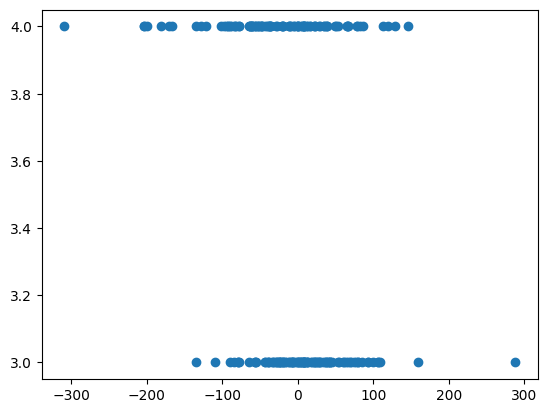

In [25]:
plt.scatter(df[(df['y'] == 3) | (df['y'] == 4)]['X3620'], df[(df['y'] == 3) | (df['y'] == 4)]['y'])